In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [3]:
df = pd.DataFrame(iris.data, columns = ['sepal length', 'sepal width', 'petal length', 'petal width'])
df['category'] = iris.target

In [4]:
df.head()

,sepal length,sepal width,petal length,petal width,category
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
df.isna().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
category        0
dtype: int64

In [6]:
df['category'].unique()

array([0, 1, 2])

In [7]:
df['category'] = df['category'].replace({0 : 'setosa', 1 : "versicolor", 2 : 'virginica'})

In [8]:
df['category'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

**Listing Categorical and Numerical Datatypes**

In [12]:
numericColumns = df.select_dtypes(include = 'number').columns
numericColumns

Index(['sepal length', 'sepal width', 'petal length', 'petal width'], dtype='object')

In [13]:
categoricColumns = df.select_dtypes(include = "category").columns
categoricColumns

Index([], dtype='object')

**Histogram for all the columns**

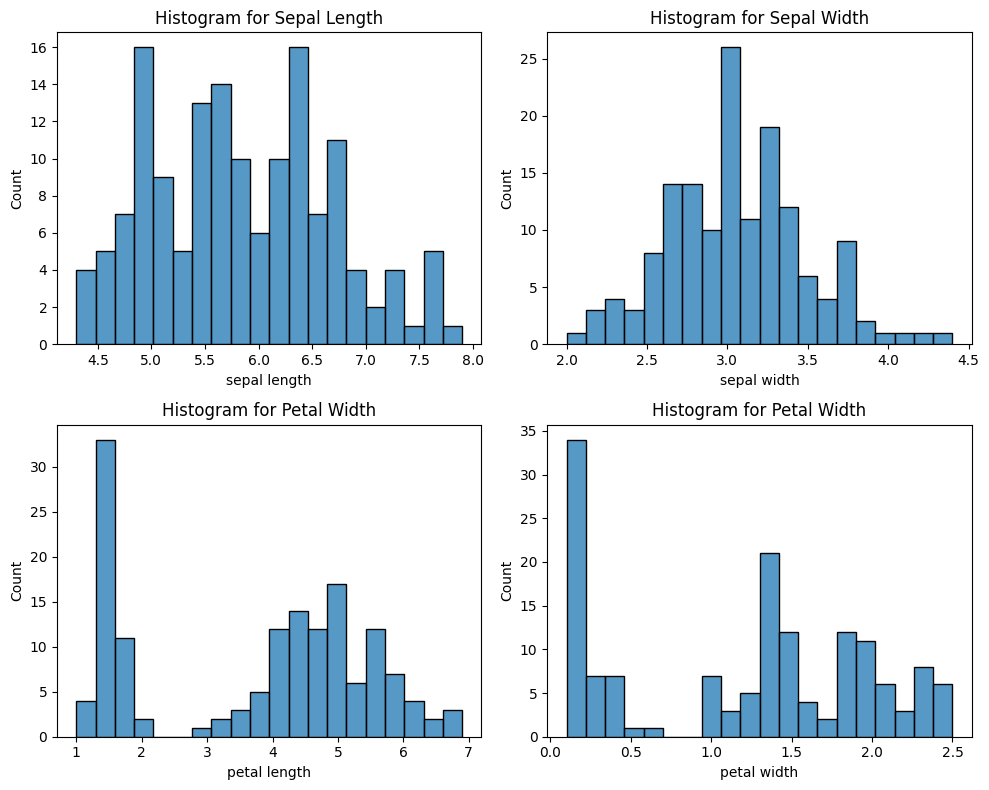

In [24]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data = df, x = 'sepal length', bins = 20, ax = axes[0, 0])
axes[0, 0].set_title('Histogram for Sepal Length')

sns.histplot(data = df, x = 'sepal width', bins = 20, ax = axes[0, 1])
axes[0, 1].set_title("Histogram for Sepal Width")

sns.histplot(data = df, x = 'petal length', bins = 20, ax = axes[1, 0])
axes[1, 0].set_title("Histogram for Petal Width")

sns.histplot(data = df, x = 'petal width', bins = 20, ax = axes[1, 1])
axes[1, 1].set_title("Histogram for Petal Width")

plt.tight_layout()

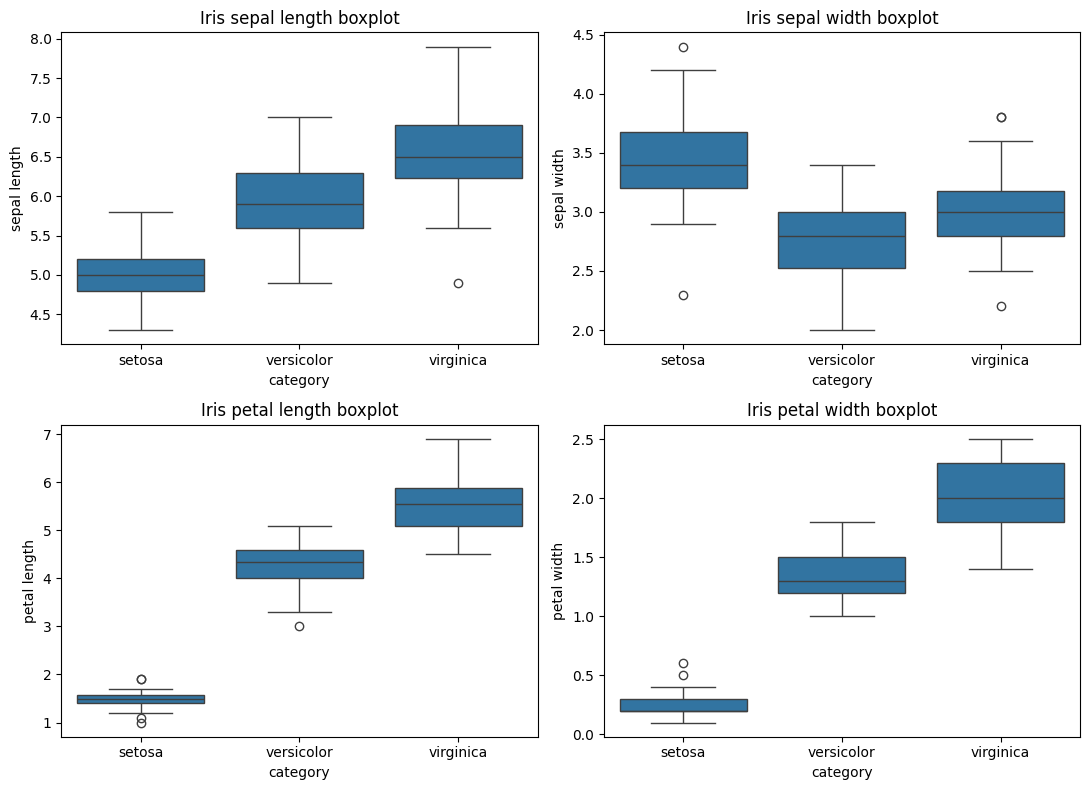

In [32]:
fig, axes = plt.subplots(2, 2, figsize = (11, 8))

sns.boxplot(data = df, x = 'category', y = 'sepal length', ax = axes[0, 0])
axes[0, 0].set_title('Iris sepal length boxplot')

sns.boxplot(data = df, x = 'category', y = 'sepal width', ax = axes[0, 1])
axes[0, 1].set_title('Iris sepal width boxplot')

sns.boxplot(data = df, x = 'category', y = 'petal length', ax = axes[1, 0])
axes[1, 0].set_title('Iris petal length boxplot')

sns.boxplot(data = df, x = 'category', y = 'petal width', ax = axes[1, 1])
axes[1, 1].set_title('Iris petal width boxplot')

plt.tight_layout()

**Removing outliers**

<Axes: xlabel='category', ylabel='sepal width'>

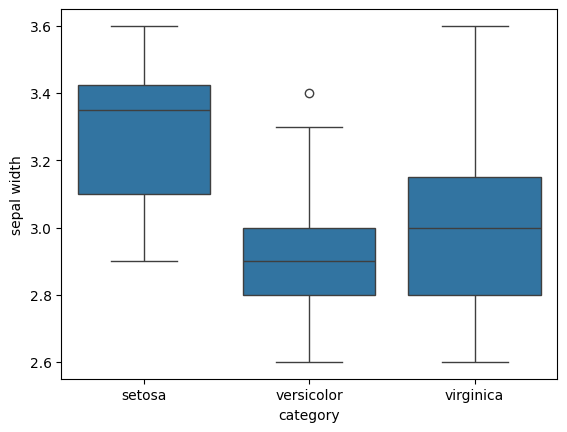

In [34]:
lowerLimit = df["sepal width"] > 2.5
upperLimit = df["sepal width"] < 3.7
df = df[(lowerLimit) & (upperLimit)]
sns.boxplot(data = df, x = 'category', y = 'sepal width')

In [35]:
def iqr(col : pd.core.series.Series) :
  Q1 = col.quantile(0.25)
  Q3 = col.quantile(0.75)
  IQR = Q3 - Q1
  lowerLimit = Q1 - 1.5 * IQR
  upperLimit = Q3 + 1.5 * IQR

  newCol = col[ (col < upperLimit) & (col > lowerLimit) ]
  return newCol

<Axes: xlabel='petal length'>

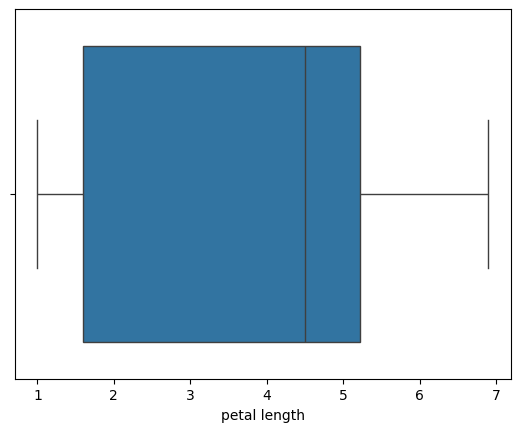

In [40]:
petalLength = iqr(df["petal length"])
sns.boxplot(data = df, x = petalLength)

<Axes: xlabel='petal width'>

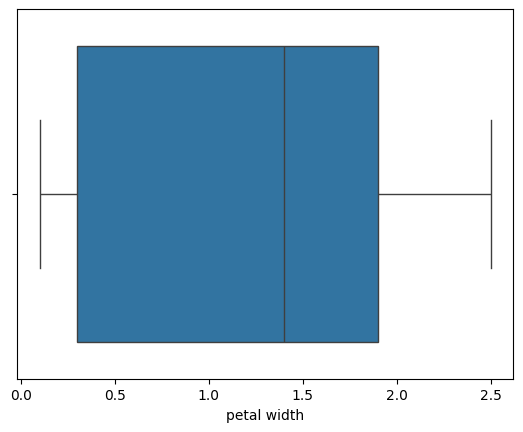

In [41]:
sns.boxplot(data = df, x = df['petal width'])

**Scatterplot for combinations**

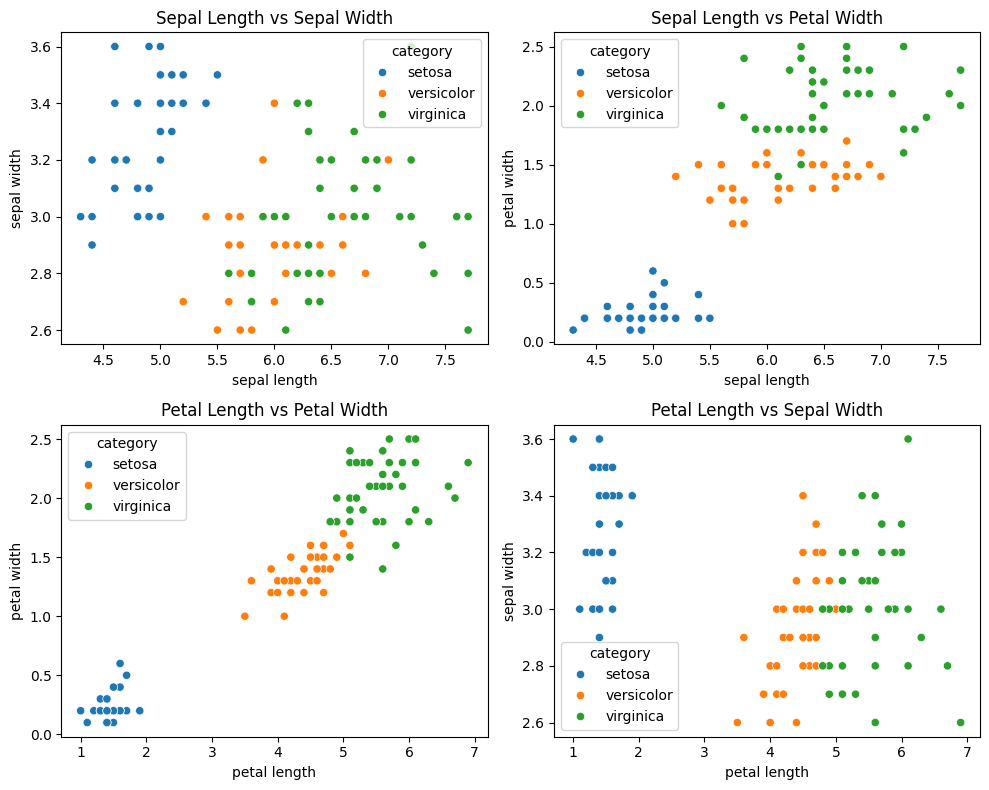

In [46]:
fig, axes = plt.subplots(2, 2, figsize = (10, 8))

sns.scatterplot(data = df, x = 'sepal length', y = 'sepal width', hue = 'category', ax = axes[0, 0])
axes[0, 0].set_title("Sepal Length vs Sepal Width")

sns.scatterplot(data = df, x = 'sepal length', y = 'petal width', hue = 'category', ax = axes[0, 1])
axes[0, 1].set_title("Sepal Length vs Petal Width")

sns.scatterplot(data = df, x = 'petal length', y = 'petal width', hue = 'category', ax = axes[1, 0])
axes[1, 0].set_title("Petal Length vs Petal Width")

sns.scatterplot(data = df, x = 'petal length', y = 'sepal width', hue = 'category', ax = axes[1, 1])
axes[1, 1].set_title("Petal Length vs Sepal Width")

plt.tight_layout()